In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [7]:
# loading claimants data 

claimants = pd.read_csv("claimants.csv")

claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [8]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)


<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

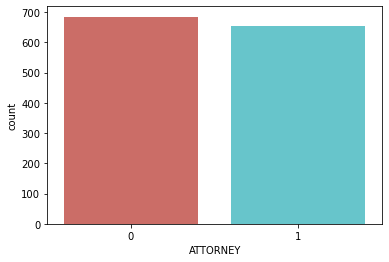

In [9]:
# Getting the barplot for the categorical columns 

sb.countplot(x="ATTORNEY",data=claimants,palette="hls")

<AxesSubplot:xlabel='ATTORNEY'>

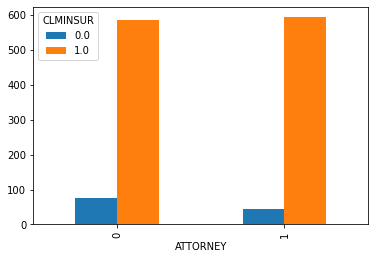

In [10]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")
                            

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMAGE'>

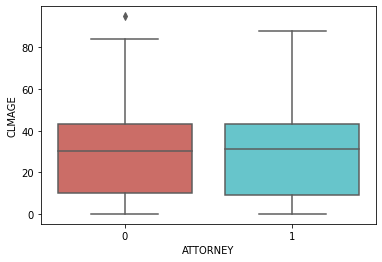

In [11]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")


<AxesSubplot:xlabel='ATTORNEY', ylabel='LOSS'>

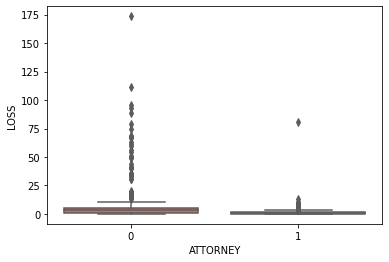

In [12]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMSEX', ylabel='CLMAGE'>

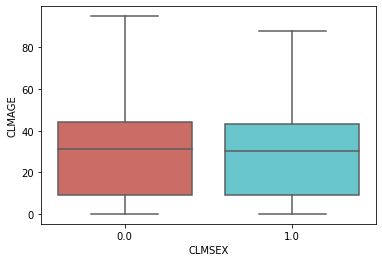

In [13]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMSEX', ylabel='LOSS'>

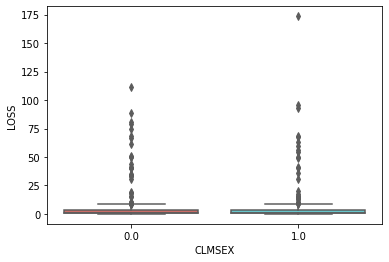

In [14]:
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

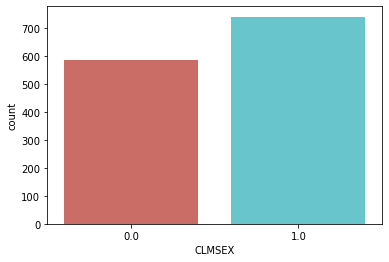

In [15]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMSEX'>

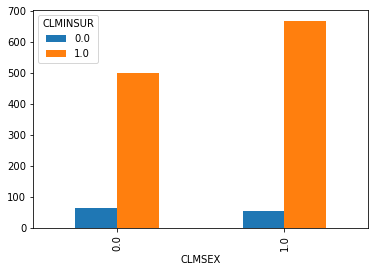

In [16]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")


<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

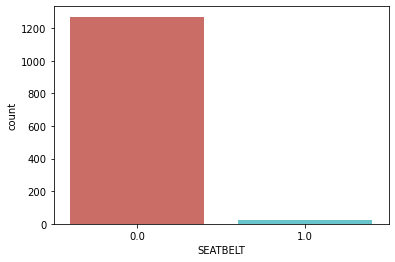

In [17]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")


<AxesSubplot:xlabel='SEATBELT'>

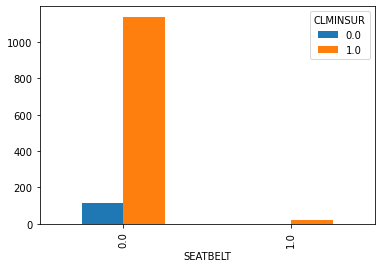

In [18]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")


<AxesSubplot:xlabel='CLMINSUR', ylabel='count'>

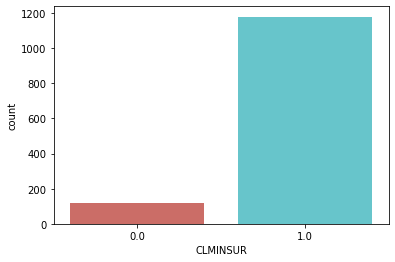

In [19]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

In [20]:
# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns


<AxesSubplot:xlabel='SEATBELT', ylabel='CLMAGE'>

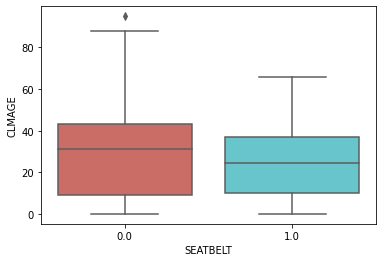

In [21]:
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")


<AxesSubplot:xlabel='SEATBELT', ylabel='LOSS'>

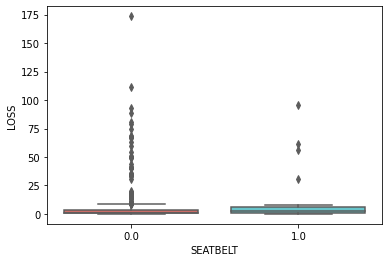

In [22]:
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMINSUR', ylabel='CLMAGE'>

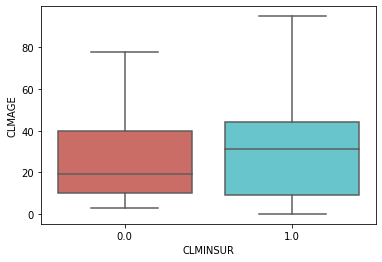

In [23]:
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")


<AxesSubplot:xlabel='CLMINSUR', ylabel='LOSS'>

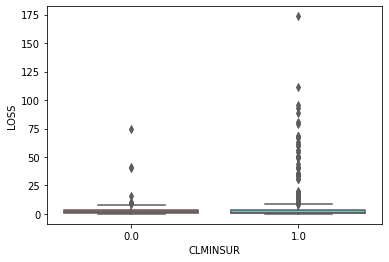

In [24]:
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")


In [25]:
# To get the count of null values in the data 

claimants.isnull().sum()


claimants.shape # 1340 6 => Before dropping null values


(1340, 6)

In [26]:
# To drop null values ( dropping rows)

claimants.dropna().shape # 1096 6 => After dropping null values


(1096, 6)

In [27]:
# Fill nan values with mode of the categorical column 

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1

claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1


In [28]:
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4
# Model building 
from sklearn.linear_model import LogisticRegression


In [29]:
claimants.shape
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]

In [30]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [31]:
classifier.coef_ # coefficients of features 


array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [32]:
classifier.predict_proba (X) # Probability values 


array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [33]:
y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[435 250]
 [147 508]]


In [35]:
type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)


ATTORNEY,0,1
row_0,,
0,435,147
1,250,508
